In [10]:
pip install 'itkwidgets[lab]>=1.0a37' 'ngff-zarr[dask-image]' zarr

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
from ipyfilechooser import FileChooser

import zarr
from ngff_zarr import (
    detect_cli_io_backend,
    cli_input_to_ngff_image,
    to_multiscales,
    to_ngff_zarr,
    Methods,
)
from itkwidgets import view

input_chooser = FileChooser('/alsuser')
input_chooser.show_only_dirs = True
input_chooser.title = f'Directory with image files.'
display(input_chooser)

FileChooser(path='/alsuser', filename='', title='Directory with image files.', show_hidden=False, select_desc=…

In [3]:
if input_chooser.selected_path is None:
    raise TypeError("You forgot to set a image file directory")

image_dir = input_chooser.selected_path
file_names = os.listdir(image_dir)
file_paths = [os.path.join(image_dir, file_name) for file_name in file_names if not file_name.startswith('.')]

out_zarr_directory = os.path.join(image_dir, '..', os.path.basename(image_dir) + '.zarr')

backend = detect_cli_io_backend(file_paths)
image = cli_input_to_ngff_image(backend, file_paths)
multiscales = to_multiscales(image, method=Methods.DASK_IMAGE_GAUSSIAN)
to_ngff_zarr(out_zarr_directory, multiscales)

fsstore = zarr.storage.FSStore(out_zarr_directory)
recon_image = zarr.open_group(fsstore, mode='r')
print('NGFF Zarr created')


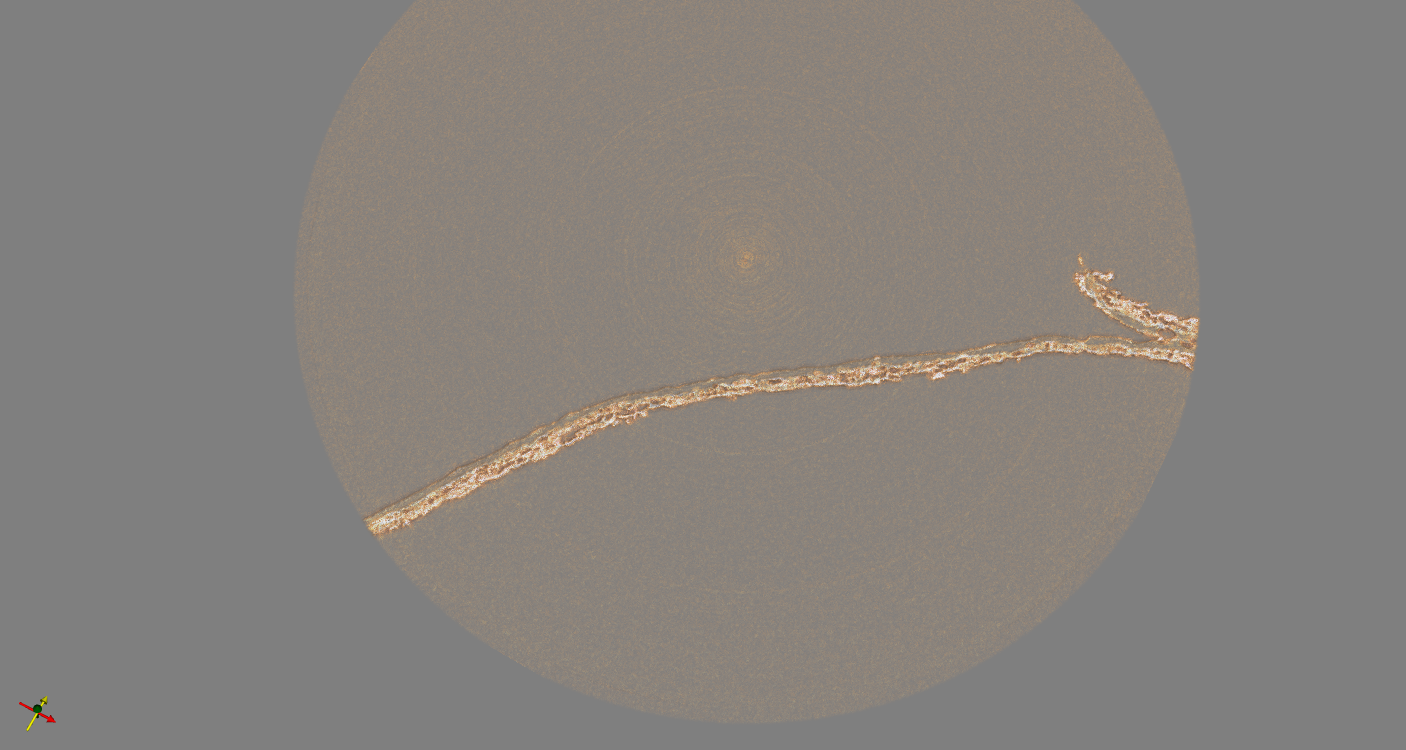
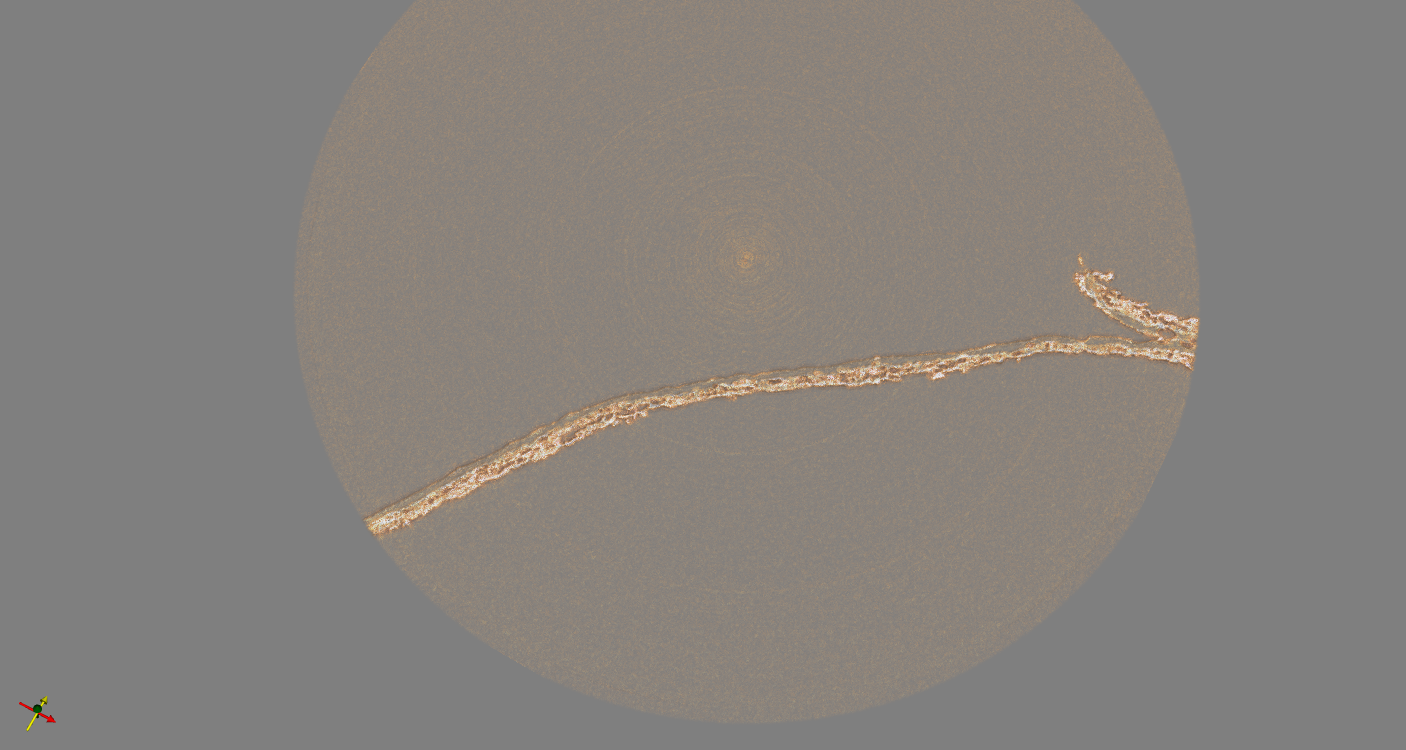

<IPython.core.display.Javascript object>

In [9]:
viewer = view(recon_image)
viewer.set_image_gradient_opacity(.1)

In [5]:
dir(viewer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_point_set',
 'bg_jobs',
 'bg_thread',
 'compare_images',
 'deferred_queue',
 'has_viewer',
 'itk_viewer',
 'loop',
 'queue',
 'queue_request',
 'queue_worker',
 'run_queued_requests',
 'select_layer',
 'set_annotations_enabled',
 'set_axes_enabled',
 'set_background_color',
 'set_image',
 'set_image_blend_mode',
 'set_image_color_map',
 'set_image_color_range',
 'set_image_color_range_bounds',
 'set_image_component_visibility',
 'set_image_gradient_opacity',
 'set_image_gradient_opacity_scale',
 'set_image_interpolation_enabled',
 'set_image_piecewise_function_gaussians',
 'set_image_shadow_enabled',
 'set_image_volu

In [4]:
delete_dir = '/alsuser/notebooks/output/20230606_150025_jong-seto_fungal-mycelia_roll-AQ_fungi1.zarr'
import shutil
# shutil.rmtree(delete_dir)